First, we will read csv file into pandas data frame

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd

df = pd.read_csv('/content/gdrive/My Drive/combined_data.csv')
print(df.shape)

(17031, 13369)


Here, we will just split the data into train and test sets. Test set size is 30% of the data, while train set size is 70% (obviously).

In [0]:
y = df['class']

# rest of the data
X = df.loc[:, df.columns != 'class']


In [0]:
# split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# CLASSIFICATION

## KNN


Okay, let's start! We begin wilh KNN classifiers. We will run both weighted (distance) and non-weighted knn for different number of neighbors and see how will they behave.


In [0]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import gc

error = []
ks = [3, 5, 7, 10, 15, 20, 50]

for i in ks:
    knn_i = KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(X_train, y_train)
    
    pred_i = knn_i.predict(X_test)
    error.append(np.abs(np.mean(pred_i != y_test)))
    
    gc.collect()
    

Text(0, 0.5, 'Mean Absolute Error')

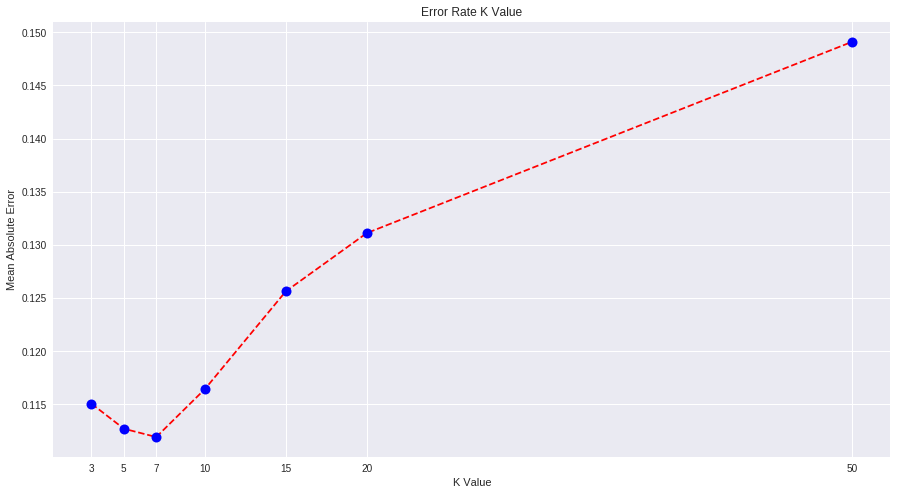

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))  
plt.plot(ks, error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)

plt.xticks(ks)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

In [0]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import gc

error_weighted = []
ks = [3, 5, 7, 10, 15, 20, 50]

for i in ks:
    knn_i = KNeighborsClassifier(n_neighbors=i, weights='distance')
    knn_i.fit(X_train, y_train)
    
    pred_i = knn_i.predict(X_test)
    error_weighted.append(np.abs(np.mean(pred_i != y_test)))
    
    gc.collect()
    

Text(0, 0.5, 'Mean Absolute Error')

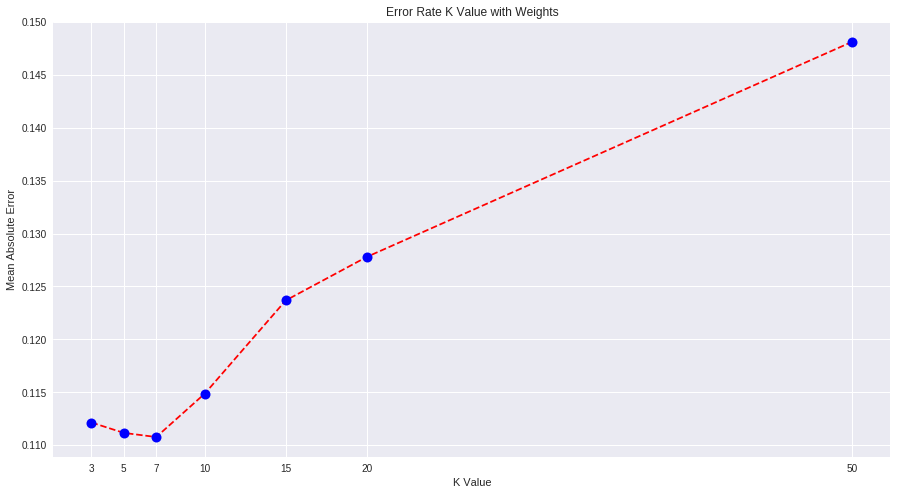

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))  
plt.plot(ks, error_weighted, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)

plt.xticks(ks)
plt.title('Error Rate K Value with Weights')  
plt.xlabel('K Value')  
plt.ylabel('Mean Absolute Error')

We can see that **KNN with 7 neighbors** is giving us the best result. Also, weighted method might be *a little* bit more accurate. Let us check that by building the following models:

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

n = 7

print('KNN, n = 7, no weights:')

knn = KNeighborsClassifier(n_neighbors=n)
knn.fit(X_train, y_train)

# test data...
y_pred = knn.predict(X_test)

print('Test set acc: {}'.format(knn.score(X_test, y_test)))
print('MAE: {}'.format(np.abs(np.mean(y_pred != y_test)))) # mean absolute error

print()
print('confusion matrix: ')
print(confusion_matrix(y_test, y_pred))
print()
print('classification report:')
print(classification_report(y_test, y_pred))

KNN, n = 7, no weights:
Test set acc: 0.8776908023483366
MAE: 0.1223091976516634

confusion matrix: 
[[ 198    0    0    2    1   51    1]
 [   0    0    0   17    6    0    0]
 [   0    1   18  135   32    0    0]
 [   0    0    8 1026  214    0    1]
 [   0    0    2   99 2280    0    0]
 [   2    0    0    6    5  860    3]
 [   3    0    0    0    1   35  103]]

classification report:
              precision    recall  f1-score   support

      class1       0.98      0.78      0.87       253
      class2       0.00      0.00      0.00        23
      class3       0.64      0.10      0.17       186
      class4       0.80      0.82      0.81      1249
      class5       0.90      0.96      0.93      2381
      class6       0.91      0.98      0.94       876
      class7       0.95      0.73      0.82       142

   micro avg       0.88      0.88      0.88      5110
   macro avg       0.74      0.62      0.65      5110
weighted avg       0.87      0.88      0.86      5110



In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

n = 7

print('KNN, n = 7, weights = distance:')

knn = KNeighborsClassifier(n_neighbors=n, weights='distance')
knn.fit(X_train, y_train)

# test data...
y_pred = knn.predict(X_test)

print('Test set acc: {}'.format(knn.score(X_test, y_test)))
print('MAE: {}'.format(np.abs(np.mean(y_pred != y_test)))) # mean absolute error

print()
print('confusion matrix: ')
print(confusion_matrix(y_test, y_pred))
print()
print('classification report:')
print(classification_report(y_test, y_pred))

KNN, n = 7, weights = distance:
Test set acc: 0.8782778864970646
MAE: 0.12172211350293542

confusion matrix: 
[[ 198    0    0    2    1   51    1]
 [   0    0    0   17    6    0    0]
 [   0    0   15  136   35    0    0]
 [   0    0    7 1026  215    0    1]
 [   0    0    1   98 2282    0    0]
 [   2    0    0    3    5  863    3]
 [   3    0    0    0    0   35  104]]

classification report:
              precision    recall  f1-score   support

      class1       0.98      0.78      0.87       253
      class2       0.00      0.00      0.00        23
      class3       0.65      0.08      0.14       186
      class4       0.80      0.82      0.81      1249
      class5       0.90      0.96      0.93      2381
      class6       0.91      0.99      0.95       876
      class7       0.95      0.73      0.83       142

   micro avg       0.88      0.88      0.88      5110
   macro avg       0.74      0.62      0.65      5110
weighted avg       0.87      0.88      0.86      5110



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


So, the weighed model is better, but the difference is negligible. These models are doing very poorly in classification of class2, the class with the smallest number of patterns.


## Naive Bayes

We continue with **Naive Bayes** classificators. NB classificators won't probably have very good results, because of the data, but we will see.

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB

mnb = MultinomialNB()
mnb.fit(X_train, y_train)
print('MultinomialNB train acc: {}'.format(mnb.score(X_train, y_train)))
print('MultinomialNB test acc: {}'.format(mnb.score(X_test, y_test)))


cnb = ComplementNB()
cnb.fit(X_train, y_train)
print('ComplementNB train acc: {}'.format(cnb.score(X_train, y_train)))
print('ComplementNB test acc: {}'.format(cnb.score(X_test, y_test)))

MultinomialNB train acc: 0.6975924838520259
MultinomialNB test acc: 0.674559686888454
ComplementNB train acc: 0.7101753208623438
ComplementNB test acc: 0.7058708414872799


We can clearly see that the KNN model is better.


## SVM

The next model will be **SVM**. Without any particular reason. classification will start with **rbf** kernel, and than we will try the others.


In [0]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import numpy as np

clf = SVC(C=100, kernel='rbf', gamma=0.1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('MAE: {}'.format(np.abs(np.mean(y_pred != y_test))))
print(confusion_matrix(y_test, y_pred))

MAE: 0.535812133072407
[[   0    0    0    0  244    0    0]
 [   0    0    0    0   20    0    0]
 [   0    0    0    0  195    0    0]
 [   0    0    0    0 1199    0    0]
 [   0    0    0    0 2372    0    0]
 [   0    0    0    0  920    0    0]
 [   0    0    0    0  160    0    0]]


The results we got are bad. As we can see, this classifier is telling us that every class is class5.
We will now check will polynomial kernel behave better, and for which degree.

In [0]:
from sklearn.svm import SVC
import numpy as np

error = []
degrees = [1, 2, 3, 4, 5, 6]

for d in degrees:
    clf = SVC(C=100, kernel='poly', degree=d, gamma=0.1)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    error.append(np.abs(np.mean(y_pred != y_test)))

Text(0, 0.5, 'Mean Absolute Error')

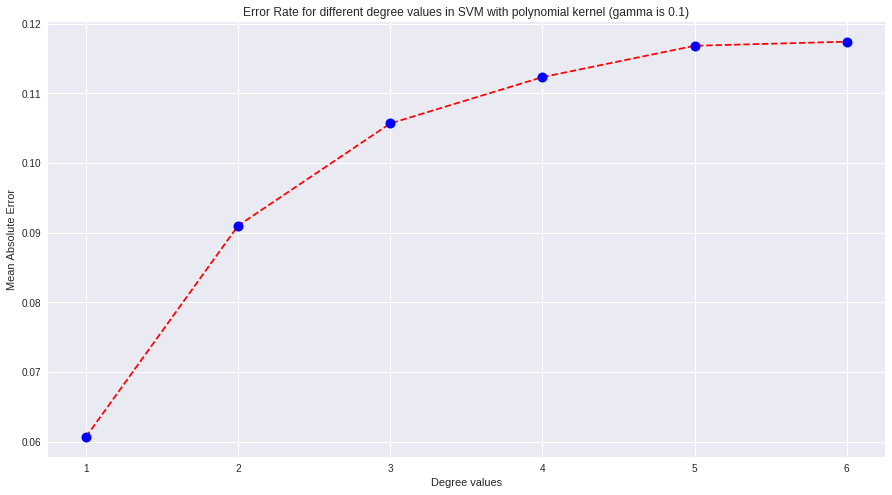

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))  
plt.plot(degrees, error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)

plt.xticks(degrees)
plt.title('Error Rate for different degree values in SVM with polynomial kernel (gamma is 0.1)')  
plt.xlabel('Degree values')  
plt.ylabel('Mean Absolute Error')

So, here we have really good results. For polynomial kernel, where d = 1, we have the best results so far, MAE appears to be just 0.06, **awesome!**

Now let's run SVM again and see how it behaves for different value of gamma. Here, we set gamma to 'scale'.

In [0]:
from sklearn.svm import SVC
import numpy as np

error = []
degrees = [1, 2, 3, 4, 5, 6]

for d in degrees:
    clf = SVC(C=100, kernel='poly', degree=d, gamma='scale')
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    error.append(np.abs(np.mean(y_pred != y_test)))

Text(0, 0.5, 'Mean Absolute Error')

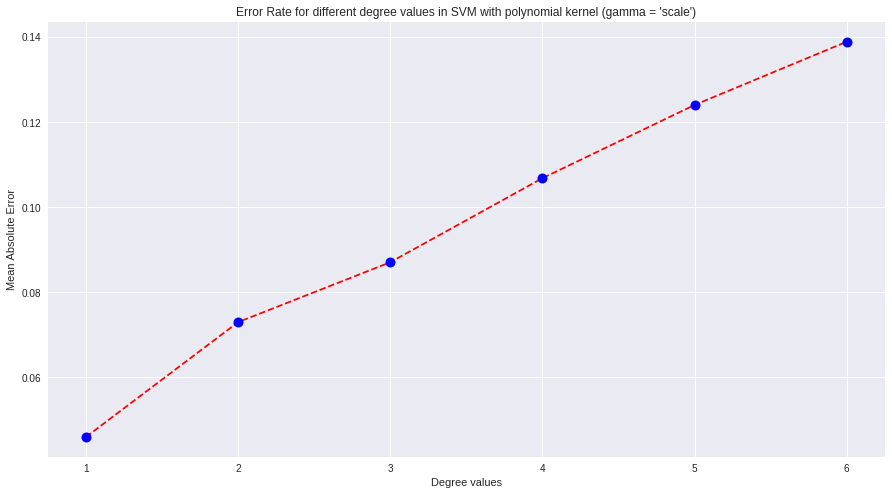

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))  
plt.plot(degrees, error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)

plt.xticks(degrees)
plt.title('Error Rate for different degree values in SVM with polynomial kernel (gamma = \'scale\')')  
plt.xlabel('Degree values')  
plt.ylabel('Mean Absolute Error')

**Okay, THIS IS EPIC!**


Let's test the model where d = 1 and gamma = 'scale', what appears to be our best model so far.


In [0]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

clf = SVC(C=100, kernel='poly', degree=1, gamma='scale')
clf.fit(X_train, y_train)

print('Train set acc: {}'.format(clf.score(X_train, y_train)))
print('Test set acc: {}'.format(clf.score(X_test, y_test)))

y_pred = clf.predict(X_test)

print('confusion matrix:')
print(confusion_matrix(y_test, y_pred))
print()
print('classification report:')
print(classification_report(y_test, y_pred))

Train set acc: 0.9664457679724855
Test set acc: 0.9540117416829745
confusion matrix:
[[ 230    0    0    0    0   10    1]
 [   0    7    2   10    4    0    0]
 [   0    2  117   32   22    0    0]
 [   0    1    9 1101  105    0    0]
 [   0    0    4   14 2323    0    0]
 [   0    0    0    1    2  967    0]
 [   0    0    0    0    1   15  130]]

classification report:
              precision    recall  f1-score   support

      class1       1.00      0.95      0.98       241
      class2       0.70      0.30      0.42        23
      class3       0.89      0.68      0.77       173
      class4       0.95      0.91      0.93      1216
      class5       0.95      0.99      0.97      2341
      class6       0.97      1.00      0.99       970
      class7       0.99      0.89      0.94       146

   micro avg       0.95      0.95      0.95      5110
   macro avg       0.92      0.82      0.86      5110
weighted avg       0.95      0.95      0.95      5110



**It is!** The classification accuracy between train and test sets exist, but is not significant, I think. Now we will increase C parameter.

In [0]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

clf = SVC(C=300, kernel='poly', degree=1, gamma='scale')
clf.fit(X_train, y_train)

print('Train set acc: {}'.format(clf.score(X_train, y_train)))
print('Test set acc: {}'.format(clf.score(X_test, y_test)))

y_pred = clf.predict(X_test)

print('confusion matrix:')
print(confusion_matrix(y_test, y_pred))
print()
print('classification report:')
print(classification_report(y_test, y_pred))

Train set acc: 0.979615804043285
Test set acc: 0.950880626223092
confusion matrix:
[[ 228    0    0    1    1   13    1]
 [   0    2    3    7    2    0    0]
 [   0    6  111   46   13    0    0]
 [   0    1   18 1173  100    0    1]
 [   0    0    3   22 2309    0    0]
 [   1    0    0    0    0  885    0]
 [   2    0    0    0    0   10  151]]

classification report:
              precision    recall  f1-score   support

      class1       0.99      0.93      0.96       244
      class2       0.22      0.14      0.17        14
      class3       0.82      0.63      0.71       176
      class4       0.94      0.91      0.92      1293
      class5       0.95      0.99      0.97      2334
      class6       0.97      1.00      0.99       886
      class7       0.99      0.93      0.96       163

   micro avg       0.95      0.95      0.95      5110
   macro avg       0.84      0.79      0.81      5110
weighted avg       0.95      0.95      0.95      5110



The result is better on train set, but slightly worse on test set. The biggest difference in accuracy can be observed in classification of class2, where smaller margin has the edge.

I would say that the model with lower value for C is better, slightly, but better.

## Ensemble

Okay, the next in line are the ensemble methods, and we will use them to try to improve the results we got so far.
A lot of differents models will be tested.

We will first start with bagging methods, primarily with **Random Forest Classifier**. 

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rfc = RandomForestClassifier(n_estimators=100, criterion='gini')
rfc.fit(X_train, y_train)

print('Train set acc: {}'.format(rfc.score(X_train, y_train)))
print('Test set acc: {}'.format(rfc.score(X_test, y_test)))

y_pred = rfc.predict(X_test)
print('confusion matrix:')
print(confusion_matrix(y_test, y_pred))

Train set acc: 1.0
Test set acc: 0.8489236790606653
confusion matrix:
[[ 169    0    0    4    4   68    1]
 [   0    0    0   17    4    0    0]
 [   0    0    0  138   40    0    0]
 [   0    0    0  956  274    0    0]
 [   0    0    1  140 2249    0    0]
 [   2    0    0    1    9  862    5]
 [   0    0    0    0    0   64  102]]


I tried different number of estimators for gini index and always got roughly the same result, accuracy on a test set is around 0.85, which is not bad, but it is really not very good either.

Now we will check if model with entropy as a criterion act differently.

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rfc = RandomForestClassifier(n_estimators=100, criterion='entropy')
rfc.fit(X_train, y_train)

print('Train set acc: {}'.format(rfc.score(X_train, y_train)))
print('Test set acc: {}'.format(rfc.score(X_test, y_test)))

y_pred = rfc.predict(X_test)
print('confusion matrix:')
print(confusion_matrix(y_test, y_pred))

Train set acc: 1.0
Test set acc: 0.8422700587084149
confusion matrix:
[[ 160    0    0    0   12   72    2]
 [   0    0    0   18    3    0    0]
 [   0    0    0  133   45    0    0]
 [   0    0    0  925  305    0    0]
 [   0    0    0  136 2254    0    0]
 [   0    0    0    1   12  863    3]
 [   0    0    0    0    0   64  102]]


The results are similar, accuracy on a test set is, again, for different number of estimators, around 0.85, although the results with entropy are little worse for lower estimator numbers.

Now we will try to upgrade our accuracy with bagging on some models that have already gave us good results, **KNN** with seven neighbors and **SVM** with polynomial kernel with one degree. 

We got pretty much the same results for weighted and non-weightd method in KNN before, so our model now won't use weights, without any particular reason.

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

knn = KNeighborsClassifier(n_neighbors=7)

bclf = BaggingClassifier(base_estimator=knn, n_estimators=3, max_samples=0.4)
bclf.fit(X_train, y_train)

print('Train set acc: {}'.format(bclf.score(X_train, y_train)))
print('Test set acc: {}'.format(bclf.score(X_test, y_test)))

Train set acc: 0.8803791628219109
Test set acc: 0.8671232876712329


Prameters are, n_estimators = 3 and max_samples = 0.4. Unfortunately,  for greater values I got MemoryError, A.K.A. not enough RAM, so if I want to increase one of them, I also have do decrease the other. This means that our flexibility very is limited.

The result is worse than it was without bagging, but not by much, and might be better for larger values of the parameters, but, as mentioned, we can't test that.

Now we will do the same with SVM.

In [0]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

svm = SVC(C=100, kernel='poly', degree=1, gamma='scale')

bclf = BaggingClassifier(base_estimator=svm, n_estimators=20, max_samples=0.5)
bclf.fit(X_train, y_train)

print('Train set acc: {}'.format(bclf.score(X_train, y_train)))
print('Test set acc: {}'.format(bclf.score(X_test, y_test)))

Train set acc: 0.9560439560439561
Test set acc: 0.9454011741682975


In [0]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

svm = SVC(C=100, kernel='poly', degree=1, gamma='scale')

bclf = BaggingClassifier(base_estimator=svm, n_estimators=20, max_samples=0.6)
bclf.fit(X_train, y_train)

# print('Train set acc: {}'.format(bclf.score(X_train, y_train))) # this takes a lot of time so I commented it :D
print('Test set acc: {}'.format(bclf.score(X_test, y_test)))

Test set acc: 0.9461839530332681


The hardware limitations are still present, but for this model we could put greater values for parameters then in the knn one.

The results are, unfortunately, worse than the non-bagging SVM, but not by much, and the difference is almost insignificant. The accuracy in bagging method could potentially increase for larger values for parameters, but we can't test it. We move onto the next models.



Okay, with bagging finished, we can focus on boosting. We will use **AdaBoost** for our classification.
Because knn does not support sample weights, we start with svm. We can enable probabilites for svm by setting value of probability parameter to True (False is default).

In [0]:
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

svm = SVC(C=100, kernel='poly', degree=1, gamma='scale', probability=True)

abclf = AdaBoostClassifier(base_estimator=svm, n_estimators=2)
abclf.fit(X_train, y_train)

# print('Train set acc: {}'.format(abclf.score(X_train, y_train)))
print('Test set acc: {}'.format(abclf.score(X_test, y_test)))

This algorithm will crash after hours of execution if n_estimators > 1

Now we will boost some other methods, and observe the results. We begin with Naive Bayes. This probably won't give us good results.

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier

mnb = MultinomialNB()

abclf = AdaBoostClassifier(base_estimator=mnb, n_estimators=100)
abclf.fit(X_train, y_train)

print('MNB Train set acc: {}'.format(abclf.score(X_train, y_train)))
print('MNB Test set acc: {}'.format(abclf.score(X_test, y_test)))

MNB Train set acc: 0.28554651455414815
MNB Test set acc: 0.28238747553816046


In [0]:
from sklearn.naive_bayes import ComplementNB
from sklearn.ensemble import AdaBoostClassifier

cnb = ComplementNB()

for i in [50, 100, 200]:
    abclf = AdaBoostClassifier(base_estimator=cnb, n_estimators=i)
    abclf.fit(X_train, y_train)

    print('n_estimators={}'.format(i))
    print('CNB Train set acc: {}'.format(abclf.score(X_train, y_train)))
    print('CNB Test set acc: {}'.format(abclf.score(X_test, y_test)))


n_estimators=50
CNB Train set acc: 0.1893297542152504
CNB Test set acc: 0.19354207436399218
n_estimators=100
CNB Train set acc: 0.4219444677459945
CNB Test set acc: 0.42915851272015654
n_estimators=200
CNB Train set acc: 0.19746665548192266
CNB Test set acc: 0.20176125244618395


The results are bad, but also interesting. That's it, **Next**!

We will now try to improve decision tree classifier with boosting. The result probably won't be better than SVM but it does not hurt to try.

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

dtc = DecisionTreeClassifier()

abclf = AdaBoostClassifier(base_estimator=dtc, n_estimators=50)
abclf.fit(X_train, y_train)

print('Train set acc: {}'.format(abclf.score(X_train, y_train)))
print('Test set acc: {}'.format(abclf.score(X_test, y_test)))

Train set acc: 1.0
Test set acc: 0.824853228962818


The results are nothing special, as expected.

Can we improve RandomForest, the bagging algorithm, with boosting? Let's try.

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

rfc = RandomForestClassifier(n_estimators=100)

abclf = AdaBoostClassifier(base_estimator=rfc, n_estimators=400)
abclf.fit(X_train, y_train)

print('Train set acc: {}'.format(abclf.score(X_train, y_train)))
print('Test set acc: {}'.format(abclf.score(X_test, y_test)))

Train set acc: 1.0
Test set acc: 0.8528375733855186


Well, the results *did* improve in random forest model with bagging, but for very little. Maybe we could get further improvements if we increase number of estimators, but I highly doubt that those improvements will be significant because the difference in results for 50 and 250 estimators is almost non-existent.

And now, our last approach, **Voting classifiers**. We will create some models from before, and do the voting.

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.ensemble import VotingClassifier

rfc = RandomForestClassifier(n_estimators=100, criterion='gini')
knn = KNeighborsClassifier(n_neighbors=7)
mnb = MultinomialNB()
svc = SVC(C=100, kernel='poly', degree=1, gamma='scale')

mdl = VotingClassifier(estimators=[('RFC', rfc), ('KNN', knn), ('MNB', mnb), ('SVM', svc)], voting='hard')
mdl.fit(X_train, y_train)

print('Train set acc: {}'.format(mdl.score(X_train, y_train)))
print('Test set acc: {}'.format(mdl.score(X_test, y_test)))

Train set acc: 0.9823001426054861
Test set acc: 0.9168297455968689


The results are good, but the difference in accuracy on test and training sets is significant. Maybe we will see the improvement in out next model.

The same thing, with same models used for voting, but with weights for each of the models added. Weights have the value they have because the better models from before should have greater weights. Naive Bayes one is bad, but I used it nonetheless.

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.ensemble import VotingClassifier

rfc = RandomForestClassifier(n_estimators=100, criterion='gini')
knn = KNeighborsClassifier(n_neighbors=7)
mnb = MultinomialNB() 
svc = SVC(C=100, kernel='poly', degree=1, gamma='scale')

mdl = VotingClassifier(estimators=[('RFC', rfc), ('KNN', knn), ('MNB', mnb), ('SVM', svc)], voting='hard', weights=[1.5, 1.7, 1, 2.5])
mdl.fit(X_train, y_train)

print('Train set acc: {}'.format(mdl.score(X_train, y_train)))
print('Test set acc: {}'.format(mdl.score(X_test, y_test)))

Train set acc: 0.9799513463635601
Test set acc: 0.9311154598825832


The results are better in this model than in the previous one, but they are not our best model so far.

Now we will do the voting, but the models used will be just SVC with different parameters. 

In [0]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

svc1 = SVC(C=100, kernel='poly', degree=1, gamma='scale')
svc2 = SVC(C=100, kernel='poly', degree=3, gamma='scale')
svc3 = SVC(C=100, kernel='poly', degree=1, gamma=0.1)
svc4 = SVC(C=100, kernel='poly', degree=3, gamma=0.1)

mdl = VotingClassifier(estimators=[('SVC1', svc1), ('SVC2', svc2), ('SVC3', svc3), ('SVC4', svc4)], voting='hard', weights=[1.2, 1, 1.2, 1])
mdl.fit(X_train, y_train)

print('Train set acc: {}'.format(mdl.score(X_train, y_train)))
print('Test set acc: {}'.format(mdl.score(X_test, y_test)))

Train set acc: 0.9992450297793809
Test set acc: 0.9493150684931507


Accuracy is high, but we had a slighly better model.

Our last model will be soft voting. We need models with probabilites, so the knn is out. After that, we will test this model on random patterns from the test data. 

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.ensemble import VotingClassifier

rfc = RandomForestClassifier(n_estimators=100, criterion='gini')
dt = DecisionTreeClassifier()
mnb = MultinomialNB()
svc = SVC(C=100, kernel='poly', degree=1, gamma='scale', probability=True)

mdl = VotingClassifier(estimators=[('RFC', rfc), ('DT', dt), ('MNB', mnb), ('SVM', svc)], voting='soft')
mdl.fit(X_train, y_train)


In [0]:
# random petterns from test set
print('pattern1')
print(mdl.predict_proba([X_test.iloc[4444]]))

print('pattern2')
print(mdl.predict_proba([X_test.iloc[800]]))

print('pattern3')
print(mdl.predict_proba([X_test.iloc[300]]))

print('pattern4')
print(mdl.predict_proba([X_test.iloc[2222]]))

print('pattern5')
print(mdl.predict_proba([X_test.iloc[1471]]))

print('pattern6')
print(mdl.predict_proba([X_test.iloc[0]]))

pattern1
[[1.39336530e-02 2.73696442e-04 3.10132421e-04 1.02018313e-05
  1.50071513e-02 9.57420507e-01 1.30446581e-02]]
pattern2
[[2.90000001e-01 4.25665731e-10 4.33131866e-10 1.00000005e-02
  1.00000006e-02 6.74999970e-01 1.50000265e-02]]
pattern3
[[9.02426729e-01 7.00407264e-05 2.50016082e-03 1.00001296e-02
  2.75001985e-02 4.25006243e-02 1.50021173e-02]]
pattern4
[[1.05024999e-02 4.05809846e-04 1.35620818e-03 2.59715491e-03
  2.00411943e-02 9.51941524e-01 1.31556088e-02]]
pattern5
[[5.68423293e-06 5.59443381e-03 1.79216535e-02 9.46211231e-01
  3.02567329e-02 3.40671921e-06 6.85736174e-06]]
pattern6
[[6.43677010e-04 2.45269687e-02 7.14326518e-01 2.08604855e-01
  4.83507433e-02 3.11782299e-04 3.23545508e-03]]


This is showing us the probability that the selected pattern belongs to some of the classes.
Pattern1 the most probable belongs to class6. That is probably true because probability is almost 0.96.
The highest probability for pattern2 is 0.67 for class6 also. But it should be noted that the probability for class1 is also high, compared to the others.
If we continue like this, we have that pattern3 -> class1, pattern4 -> class6, pattern5 -> class4, pattern6 -> class3.

## Neural networks

We will finish this section with Neural Networks. We will create different models with differents solvers.

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

n = len(X_train.loc[0, :])
clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(n // 16, n // 64))
clf.fit(X_train, y_train)
                    
print('Test set acc: {}'.format(clf.score(X_test, y_test)))

y_pred = clf.predict(X_test)

print('confusion matrix:')
print(confusion_matrix(y_test, y_pred))

Test set acc: 0.950293542074364
confusion matrix:
[[ 242    0    0    0    0    4    0]
 [   0    1    6    8    4    0    0]
 [   0    3  112   43   13    0    0]
 [   0    4   13 1166   68    0    0]
 [   0    1   12   64 2311    0    0]
 [   2    0    0    0    0  896    1]
 [   4    0    0    0    0    4  128]]


Results are fine, now, adam!

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

n = len(X_train.loc[0, :])
clf = MLPClassifier(solver='adam', hidden_layer_sizes=(n // 16, n // 64))
clf.fit(X_train, y_train)
                    
print('Test set acc: {}'.format(clf.score(X_test, y_test)))

y_pred = clf.predict(X_test)

print('confusion matrix:')
print(confusion_matrix(y_test, y_pred))

Test set acc: 0.9555772994129158
confusion matrix:
[[ 225    0    0    0    0    2    0]
 [   0    0    2   15    2    0    0]
 [   0    0   76   54   26    0    0]
 [   0    0    2 1181   84    0    0]
 [   0    0    3   31 2359    0    0]
 [   1    0    0    0    0  907    0]
 [   0    0    0    0    1    4  135]]


In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

n = len(X_train.loc[0, :])
clf = MLPClassifier(solver='sgd', hidden_layer_sizes=(n // 16, n // 64))
clf.fit(X_train, y_train)
                    
print('Test set acc: {}'.format(clf.score(X_test, y_test)))

y_pred = clf.predict(X_test)

print('confusion matrix:')
print(confusion_matrix(y_test, y_pred))

Test set acc: 0.47045009784735814
confusion matrix:
[[  10    0    0    0  216    1    0]
 [   0    0    0    0   19    0    0]
 [   1    0    0    0  155    0    0]
 [   0    0    0    0 1267    0    0]
 [   0    0    0    0 2393    0    0]
 [   1    0    0    0  906    1    0]
 [   0    0    0    0  140    0    0]]


In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

n = len(X_train.loc[0, :])
clf = MLPClassifier(solver='adam', activation='tanh', hidden_layer_sizes=(n // 16, n // 64, n // 128))
clf.fit(X_train, y_train)
                    
print('Test set acc: {}'.format(clf.score(X_test, y_test)))

y_pred = clf.predict(X_test)

print('confusion matrix:')
print(confusion_matrix(y_test, y_pred))

Test set acc: 0.8812133072407045
confusion matrix:
[[ 222    0    0    0    0   14    0]
 [   0    0    0   15    2    0    0]
 [   0    0    0  167   16    1    0]
 [   0    0    0 1266   46    0    0]
 [   0    0    0  137 2122    0    0]
 [  41    0    0    0    1  893    0]
 [ 159    0    0    0    0    8    0]]


In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

n = len(X_train.loc[0, :])
clf = MLPClassifier(solver='adam', hidden_layer_sizes=(n // 16, n // 64, n // 128))
clf.fit(X_train, y_train)
                    
print('Test set acc: {}'.format(clf.score(X_test, y_test)))

y_pred = clf.predict(X_test)

print('confusion matrix:')
print(confusion_matrix(y_test, y_pred))

Test set acc: 0.9324853228962818
confusion matrix:
[[ 231    0    0    0    0    4    1]
 [   0    1    6    5    5    0    0]
 [   0    0  115   27   42    0    0]
 [   0    7   51 1120  134    0    0]
 [   0    0    3   48 2208    0    0]
 [   1    0    1    0    0  931    2]
 [   0    0    0    0    0    8  159]]


In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

n = len(X_train.loc[0, :])
clf = MLPClassifier(solver='adam')
clf.fit(X_train, y_train)
                    
print('Test set acc: {}'.format(clf.score(X_test, y_test)))

y_pred = clf.predict(X_test)

print('confusion matrix:')
print(confusion_matrix(y_test, y_pred))

Test set acc: 0.9322896281800391
confusion matrix:
[[ 230    0    0    0    0    6    0]
 [   0    0    2   12    3    0    0]
 [   1    0   59   77   47    0    0]
 [   0    0    3 1180  129    0    0]
 [   0    0    2   35 2222    0    0]
 [   1    0    0    0    3  931    0]
 [   1    0    0    0    4   20  142]]


In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

n = len(X_train.loc[0, :])
clf = MLPClassifier(solver='adam', hidden_layer_sizes=(n // 32))
clf.fit(X_train, y_train)
                    
print('Test set acc: {}'.format(clf.score(X_test, y_test)))

y_pred = clf.predict(X_test)

print('confusion matrix:')
print(confusion_matrix(y_test, y_pred))

Test set acc: 0.9287671232876712
confusion matrix:
[[ 231    0    0    0    0    5    0]
 [   0    0    0   15    2    0    0]
 [   0    0   41   79   64    0    0]
 [   0    0    3 1179  130    0    0]
 [   0    0    2   38 2218    1    0]
 [   4    0    0    0    1  930    0]
 [   2    0    0    0    0   18  147]]


In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

n = len(X_train.loc[0, :])
clf = MLPClassifier(solver='adam', activation='logistic', hidden_layer_sizes=(n // 16, n // 64))
clf.fit(X_train, y_train)
                    
print('Test set acc: {}'.format(clf.score(X_test, y_test)))

y_pred = clf.predict(X_test)

print('confusion matrix:')
print(confusion_matrix(y_test, y_pred))

Test set acc: 0.902348336594912
confusion matrix:
[[ 233    0    0    0    0    3    0]
 [   0    0    0   11    6    0    0]
 [   0    0    0   24  160    0    0]
 [   0    0   15 1084  213    0    0]
 [   0    0    2   47 2210    0    0]
 [   7    0    0    0    1  927    0]
 [   4    0    0    0    0    6  157]]


## SCALED DATA

Now, out of curiosity, we test or models on data that is scaled to **[0, 1]**. Who knows, maybe the accuracy will imporove, although it probably won't.

Therefore, we normalize data, split it into train(30%) and test(70% duh) sets, and start modeling.

In [0]:
# min max scaler (a-b) -> (0-1)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scl = MinMaxScaler()
X = scl.fit_transform(X)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, y, test_size=0.3)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [0]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB

mnb = MultinomialNB()
mnb.fit(X_train_scaled, y_train)
print('MultinomialNB train acc: {}'.format(mnb.score(X_train_scaled, y_train)))
print('MultinomialNB test acc: {}'.format(mnb.score(X_test_scaled, y_test)))


cnb = ComplementNB()
cnb.fit(X_train_scaled, y_train)
print('ComplementNB train acc: {}'.format(cnb.score(X_train_scaled, y_train)))
print('ComplementNB test acc: {}'.format(cnb.score(X_test_scaled, y_test)))


MultinomialNB train acc: 0.8863350390067948
MultinomialNB test acc: 0.8041095890410959
ComplementNB train acc: 0.7994295780555323
ComplementNB test acc: 0.7338551859099804


So, the results we got with the **Naive Bayes** classificators on scaled data are better, especially on MultinomialNB. But, the difference between accuracy on train and test sets is significant. Therefore, we might have overfitting here...



We will now see how **KNN** models behave on a scaled data.

In [0]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import gc

error = []
ks = [5, 7, 15, 25, 50, 75, 100, 125]

for i in ks:
    knn_i = KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(X_train_scaled, y_train)
    
    pred_i = knn_i.predict(X_test_scaled)
    error.append(np.abs(np.mean(pred_i != y_test)))
    
    gc.collect()

Text(0, 0.5, 'Mean Absolute Error')

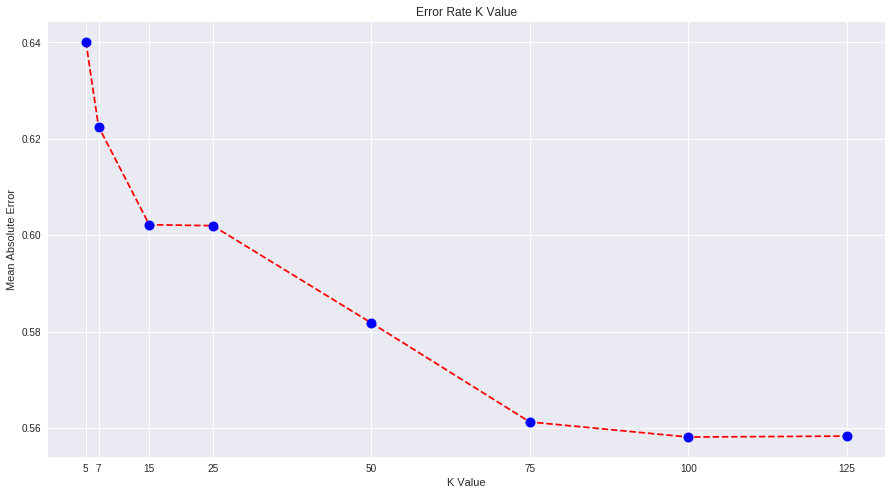

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))  
plt.plot(ks, error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)

plt.xticks(ks)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

The results are significantly worse when we scale data. The MAE appears to decrease in every iteration although the decrease is minimal in the end. This model is not good.

The next in line is SVM, rbf and poly kernels.

In [0]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import numpy as np

clf = SVC(C=100, kernel='rbf', gamma=0.1)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

print('MAE: {}'.format(np.abs(np.mean(y_pred != y_test))))
print(confusion_matrix(y_test, y_pred))

MAE: 0.5385518590998043
[[   0    0    0    0  235   11    0]
 [   0    0    0    0   18    0    0]
 [   0    0    0    1  161    0    0]
 [   0    0    0    9 1238    0    0]
 [   0    0    0    9 2324    0    0]
 [   0    0    0    0  914   25    0]
 [   0    0    0    0  160    5    0]]


In [0]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import numpy as np

clf = SVC(C=1, kernel='rbf', gamma=0.1)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

print('MAE: {}'.format(np.abs(np.mean(y_pred != y_test))))
print(confusion_matrix(y_test, y_pred))

MAE: 0.5328767123287671
[[   0    0    0    0  231    1    0]
 [   0    0    0    0   14    0    0]
 [   0    0    0    0  170    0    0]
 [   0    0    0    0 1228    0    0]
 [   0    0    0    0 2376    0    0]
 [   0    0    0    0  929   11    0]
 [   0    0    0    0  149    1    0]]


RBF kernel is indeed more accurate on normalized data but not by much.

In [0]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import numpy as np

clf = SVC(C=100, kernel='poly', degree=3, gamma=0.1)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

print('MAE: {}'.format(np.abs(np.mean(y_pred != y_test))))
print(confusion_matrix(y_test, y_pred))

MAE: 0.2720156555772994
[[ 180    0    0    0   45   18    0]
 [   0    0    5    6   10    0    0]
 [  10    1   44   34   76    0    0]
 [  24   18  145  479  606    0    0]
 [  18    0   22  168 2138   12    1]
 [   3    0    0    0   88  800    0]
 [  10    0    0    0   11   59   79]]


Polynomial kernel behaves okayish, but the results on a non-scaled data are better. **Much better!**

Scaling data did nothing good for us, though It did improve Naive Bayes classificators. Also, we had a small improvement in SVM with RBF kernel, but nothing significant.